<a href="https://colab.research.google.com/github/jabazan/Data-Science-For-Beginners/blob/main/estacionalidad_sp500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = yf.download('^GSPC')['Close'].to_frame()
df["Year"] = df.index.year
df["Month"] = df.index.month
df = df.resample('M').last()
df['variacion'] = df.Close.pct_change()
tabla = df.pivot_table(index="Year",columns="Month",values="variacion")
meses = [x[:3] for x in list(calendar.month_name[1:])]
tabla.columns = meses
tabla

[*********************100%***********************]  1 of 1 completed


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1950,NaN,0.009971,0.004065,0.038751,0.045657,-0.058040,0.008479,0.032511,0.055918,0.004113,-0.001024,0.047155
1951,0.060206,0.006463,-0.014679,0.044227,-0.040571,-0.026022,0.068702,0.039286,-0.000859,-0.013758,-0.002616,0.038899
1952,0.015566,-0.036454,0.047721,-0.043086,0.023156,0.046102,0.017628,-0.014567,-0.019576,-0.000815,0.046493,0.035464
1953,-0.007151,-0.018196,-0.023552,-0.026493,-0.003249,-0.016300,0.025269,-0.057778,0.001286,0.050964,0.008965,0.002019
1954,0.051189,0.002684,0.030210,0.048998,0.032909,0.000685,0.057172,-0.034003,0.083138,-0.019499,0.080808,0.050818
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.056179,-0.038947,-0.026884,0.002719,0.021608,0.004842,0.036022,0.030263,0.004294,-0.069403,0.017859,-0.091777
2019,0.078684,0.029729,0.017924,0.039313,-0.065778,0.068930,0.013128,-0.018092,0.017181,0.020432,0.034047,0.028590
2020,-0.001628,-0.084110,-0.125119,0.126844,0.045282,0.018388,0.055101,0.070065,-0.039228,-0.027666,0.107546,0.037121


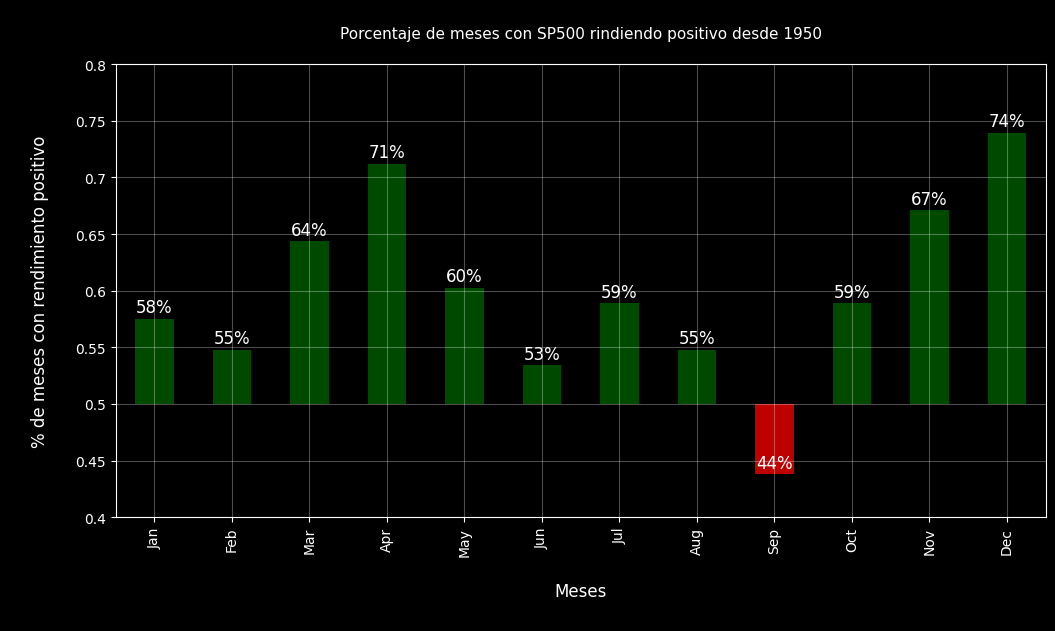

In [ ]:
meses_positivos = (tabla > 0).sum().divide(len(tabla)).add(-0.5)
colors = np.where(meses_positivos>0, 'darkgreen','red')

plt.rcParams['figure.dpi'] = 100
plt.style.use('dark_background')
fig, ax_sup = plt.subplots(figsize=(12,6))
ax.axis('off')


plots = meses_positivos.plot(kind='bar', color=colors, alpha=0.75, ax=ax_sup)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: round(x+0.5,2)))
ax_sup.grid(alpha=0.3)
ax_sup.set_title('\nPorcentaje de meses con SP500 rindiendo positivo desde 1950\n', fontsize=11)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()+0.5, '.0%'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points')

ax_sup.set_ylim(-0.1,0.3)
ax_sup.set_ylabel('\n% de meses con rendimiento positivo\n', fontsize=12)
ax_sup.set_xlabel('\nMeses\n', fontsize=12)


plt.show()

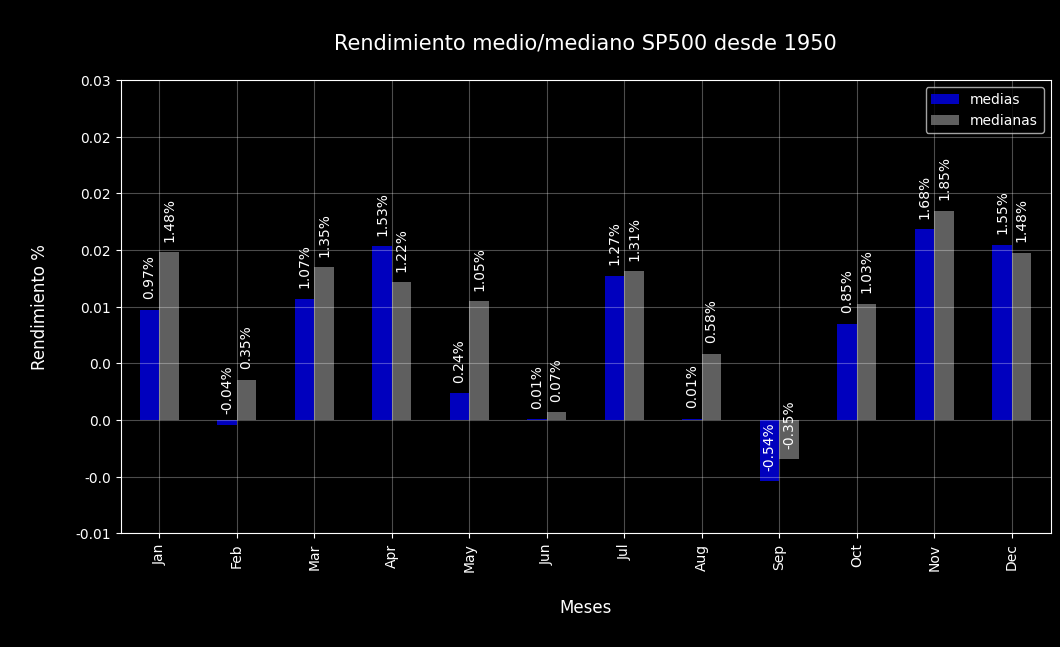

In [ ]:
medias = tabla.mean()
medianas = tabla.median()

chart = pd.concat([medias, medianas], axis=1)
chart.columns = ['medias','medianas']

plt.rcParams['figure.dpi'] = 100
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,6))
plots = chart.plot(kind='bar', color=['blue','gray'], alpha=0.75, ax=ax)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: round(x,2)))
ax.grid(alpha=0.3)
ax.set_title('\nRendimiento medio/mediano SP500 desde 1950\n', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2%'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='bottom', size=10, xytext=(0, 8),
                   textcoords='offset points', rotation=90)

ax.set_ylim(-0.01,0.03)
ax.set_ylabel('\nRendimiento %\n', fontsize=12)
ax.set_xlabel('\nMeses\n', fontsize=12)

plt.show()